## reuters数据集

### 准备数据

In [2]:
from keras.datasets import reuters
# 路透社数据集
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=1000)

2113536/2110848 [==============================] - 3s 1us/step


In [6]:
# 和IMDB编码方式很像
len(train_data),len(test_data)

(8982, 2246)

In [8]:
# 映射一下数据
word_index = reuters.get_word_index()  #word_index 是一个将单词映射为整数索引的字典
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])  # 方向字典
decoded_review = ' '.join(
 [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) 
# 0、1、2是为“padding”（填充）、“start of sequence”（序列开始）、“unknown”（未知词）分别保留的索引
# 原始序列化的时候都+3,0,1,2保留给上面，字典中没变，get(*,'?')获得value,f找不到回复‘？’
decoded_review

557056/550378 [==============================] - 1s 2us/step


'? ? ? said as a result of its december acquisition of ? co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? ? revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash ? per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
import numpy as np
np.unique(train_labels)  # 45类

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

### 数据处理

In [16]:
# 向量化
def vectorize_sequences(sequences, dimension=10000):
        results = np.zeros((len(sequences), dimension)) 
        for i, sequence in enumerate(sequences):
            results[i, sequence] = 1.           #重复不管，每次取一行，取后sequence是一个list,对每一行有值就取1
        return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)


def to_one_hot(labels, dimension=46):
        results = np.zeros((len(labels), dimension))
        for i, label in enumerate(labels):
                 results[i, label] = 1.
        return results
one_hot_train_labels = to_one_hot(train_labels) 
one_hot_test_labels = to_one_hot(test_labels)


"""
==
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
"""

### 模型搭建

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 优化器
model.compile(optimizer='rmsprop'
              ,loss='categorical_crossentropy'
              ,metrics=['accuracy'])

### 划分验证集

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### 训练模型

In [24]:
history = model.fit(partial_x_train
                    ,partial_y_train
                    ,epochs=20
                    ,batch_size=512
                    ,validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 254us/step - loss: 2.7779 - accuracy: 0.4932 - val_loss: 1.8962 - val_accuracy: 0.5950
Epoch 2/20
7982/7982 [==============================] - 1s 168us/step - loss: 1.6524 - accuracy: 0.6418 - val_loss: 1.5029 - val_accuracy: 0.6740
Epoch 3/20
7982/7982 [==============================] - 1s 176us/step - loss: 1.3750 - accuracy: 0.6977 - val_loss: 1.3176 - val_accuracy: 0.7120
Epoch 4/20
7982/7982 [==============================] - 2s 243us/step - loss: 1.2012 - accuracy: 0.7383 - val_loss: 1.1946 - val_accuracy: 0.7350
Epoch 5/20
7982/7982 [==============================] - 2s 247us/step - loss: 1.0757 - accuracy: 0.7615 - val_loss: 1.1123 - val_accuracy: 0.7520
Epoch 6/20
7982/7982 [==============================] - 2s 233us/step - loss: 0.9691 - accuracy: 0.7866 - val_loss: 1.0649 - val_accuracy: 0.7560
Epoch 7/20
7982/7982 [==============================] - 2s 243us/step - los

### 可视化
#### loss

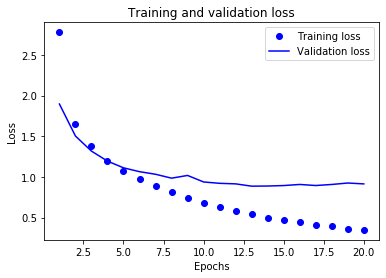

In [26]:
import matplotlib.pyplot as plt
history_dict = history.history   #信息字典


loss_values = history_dict['loss']  # 训练集的loss
val_loss_values = history_dict['val_loss']  # 验证集的loss
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### accuracy

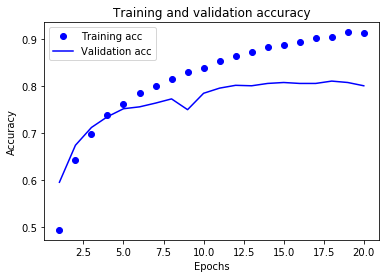

In [27]:
plt.clf()  # 清空 

acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 重构模型  - 改变epochs
### test数据上结果

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop'
              ,loss='categorical_crossentropy'
              ,metrics=['accuracy'])
model.fit(partial_x_train
          ,partial_y_train
          ,epochs=13
          ,batch_size=512
          ,validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/13
7982/7982 [==============================] - 1s 176us/step - loss: 2.7320 - accuracy: 0.5030 - val_loss: 1.8225 - val_accuracy: 0.6170
Epoch 2/13
7982/7982 [==============================] - 1s 159us/step - loss: 1.5911 - accuracy: 0.6610 - val_loss: 1.4092 - val_accuracy: 0.6840
Epoch 3/13
7982/7982 [==============================] - 1s 161us/step - loss: 1.3149 - accuracy: 0.7174 - val_loss: 1.2603 - val_accuracy: 0.7170
Epoch 4/13
7982/7982 [==============================] - 1s 162us/step - loss: 1.1548 - accuracy: 0.7477 - val_loss: 1.2450 - val_accuracy: 0.7010
Epoch 5/13
7982/7982 [==============================] - 1s 165us/step - loss: 1.0470 - accuracy: 0.7711 - val_loss: 1.0929 - val_accuracy: 0.7580
Epoch 6/13
7982/7982 [==============================] - 1s 162us/step - loss: 0.9490 - accuracy: 0.7892 - val_loss: 1.0373 - val_accuracy: 0.7720
Epoch 7/13
7982/7982 [==============================] - 1s 165us/step - loss

In [30]:
results

[0.9844438639052299, 0.7684773206710815]

In [33]:
prediction = model.predict_classes(x_test)  # 类别
prediction

array([ 3, 10,  1, ...,  3,  4,  1], dtype=int64)

### 混淆矩阵

In [36]:
import pandas as pd

pd.crosstab(test_labels,prediction.reshape(-1)
            ,rownames=['label标准答案']
           ,colnames=['predict'])    #少量没被预测到

predict,0,1,2,3,4,6,7,8,9,10,...,28,29,30,31,32,34,36,40,41,43
label标准答案,,,,,,,,,,,,,,,,,,,,,
0,8,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,84,0,7,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,10,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,4,0,771,24,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,0,36,417,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,5,5,0,0,23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,prediction))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.61      0.80      0.69       105
           2       0.59      0.50      0.54        20
           3       0.87      0.95      0.91       813
           4       0.80      0.88      0.84       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.33      0.50         3
           8       0.61      0.61      0.61        38
           9       0.95      0.76      0.84        25
          10       0.83      0.80      0.81        30
          11       0.65      0.73      0.69        83
          12       0.40      0.31      0.35        13
          13       0.42      0.51      0.46        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.71      0.71      0.71        99
          17       1.00    

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 随机估计

In [38]:
 import copy
>>> test_labels_copy = copy.copy(test_labels)
>>> np.random.shuffle(test_labels_copy)
>>> hits_array = np.array(test_labels) == np.array(test_labels_copy)
>>> float(np.sum(hits_array)) / len(test_labels)

0.19011576135351738

#### 预测的结果

In [42]:
predictions = model.predict(x_test)
predictions

array([[4.0751097e-06, 1.7192600e-04, 1.5687898e-05, ..., 1.3596763e-05,
        2.1320997e-05, 7.2658322e-06],
       [7.3609250e-03, 1.0306899e-02, 1.2595859e-01, ..., 1.3932511e-05,
        1.3868311e-05, 1.9692910e-04],
       [1.8643666e-03, 9.4465965e-01, 1.6007080e-03, ..., 3.9641807e-04,
        7.5363110e-05, 7.9463614e-04],
       ...,
       [8.7447333e-06, 4.9561355e-04, 1.5718477e-04, ..., 6.8104993e-05,
        2.1008405e-04, 5.2669937e-05],
       [3.5061839e-04, 3.3971857e-02, 7.5565688e-03, ..., 1.8052410e-04,
        1.5073136e-03, 3.9453068e-04],
       [5.7073648e-04, 4.8519915e-01, 3.4509793e-02, ..., 9.5936621e-04,
        3.1529643e-04, 2.4420880e-03]], dtype=float32)

In [44]:
np.sum(predictions[0])

0.9999993

In [45]:
 np.argmax(predictions[0])

3

###  如果y_test不做one-hot的话，就用loss='squre_categorical_crossentropy'
### y_train = np.array(train_labels)<br>y_test = np.array(test_labels)